**Project Overview**

**Course Title: CMPT 3830 - Machine Learning Work Integrated Learning-1**

**Project Title: "Days on Market Predictor for Vehicle Sales Optimization"**

Collaboration: **Go Auto **

Team Members:

1.   Rohit
2.   Spandan Dahal

1.   Abhinav Datt

2.   Jatin Dandyan

**Problem Statement:** The project aims to predict the number of days a vehicle will remain on the market before it is sold, enhancing inventory management and sales strategies for Go Auto, a vehicle dealership company.

**Solution Approach:** The approach involves cleaning the dataset, handling missing values, applying feature selection, and building a linear regression model to predict the days on the market. Key features like vehicle price, mileage, and model year are crucial for this prediction. The project also includes creating visualizations to understand data trends and refine the model for accuracy.

**Explanation of the Code:**

The provided code represents the initial steps in the data analysis and modeling process for predicting how long cars will stay on the market.


**1. Library Imports and Data Loading:**


*   Libraries like pandas, numpy, matplotlib, seaborn, and sklearn are imported to handle data manipulation, visualization, and machine learning tasks.
*   The dataset CBB_Listings cleaned1.csv is loaded into a DataFrame for analysis.



**2.   Initial Data Exploration:**

*   Displays basic information about the dataset such as the first few rows, summary statistics, data types, and basic descriptive statistics to understand the structure and contents of the data.



**3.   Data Cleaning:**

*   Checks for and counts duplicate rows, which are essential for ensuring data quality.



**4.   Feature Selection:**

*   Specific columns like model year, make, model, etc., are selected based on their relevance to the model's target outcome (days on market).



**5.   Data Preprocessing:**


*   Addresses specific anomalies in pricing data by calculating mean prices and replacing unrealistic values with these means to ensure data quality.
*   Encodes categorical data and scales numerical values to prepare the data for modeling.


**6.   Model Preparation:**

*   Sets up a machine learning pipeline with preprocessing steps and a Ridge regression model. The pipeline includes steps for imputing missing values, scaling numerical features, and encoding categorical variables.

**7. Model Training and Evaluation:**

*   The Ridge regression model is tuned using RandomizedSearchCV to find the best parameters and then evaluated on a test set to measure its performance using metrics like MSE and R-squared.

**8. Results Preparation:**


*   Predictions from the model are combined with the test set and saved to a new CSV file, facilitating further analysis or presentation of the results.



















**Library Imports and Data Loading:**

The code begins by importing necessary libraries including pandas for data handling, numpy for numerical operations, matplotlib and seaborn for visualization, and several modules from sklearn for building and evaluating machine learning models.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

We then load our dataset, CBB_Listings cleaned1.csv, into a DataFrame df. This dataset likely contains cleaned vehicle listing data, crucial for our analysis.

**Initial Data Exploration:**



*   df.head() prints the first few rows of the DataFrame, allowing us to quickly check the format of the data and the types of information each column contains.

*   df.info() provides a summary including the total number of entries, the number of non-null entries per column, and the datatype of each column, which helps in assessing data completeness and the need for data cleaning.
*   df.describe() outputs statistical summaries for numerical columns, giving us insights into the central tendency and spread of the data, which is essential for understanding the range and distribution of our features.


*   df.shape reveals the dimensionality of the DataFrame, specifically the number of rows and columns, giving an overview of the dataset's scale.



In [ ]:
# Load the dataset
df = pd.read_csv('CBB_Listings cleaned1.csv')

# Display the first few rows of the dataset to understand the structure
print(df.head())

# Display summary information about the dataset
print(df.info())

# Display basic statistics for numerical columns
print(df.describe())

# Print the shape of the DataFrame (rows, columns)
print(df.shape)

                             listing_id                  listing_heading  \
0  f5b663d2-4896-11ef-a15b-8b4423f1ff08     1987 IROC Z  350 Auto T-Tops   
1  a9f565e6-4712-11ef-a23f-79dc25c5e601                              NaN   
2  03d18c58-253a-11ef-8f33-8905b4a2f000  1989 Cadillac DeVille Sedan FWD   
3  2d12630b-460e-11ee-89c4-e5b3161d4741  1989 Cadillac DeVille Sedan FWD   
4  53a8e550-47cd-11ef-8587-f926ecb61035  1989 Camaro IROC 350 Auto T-Top   

  listing_type                                        listing_url  \
0       Active  https://www.kijiji.ca/v-cars-trucks/edmonton/1...   
1         Sold  https://www.redlinemotors.ca/vehicle-details/1...   
2       Active  https://www.sweetheartmotor.com/cars/used/1989...   
3       Active  https://www.sweetheartmotor.com/cars/used/1989...   
4       Active  https://www.kijiji.ca/v-cars-trucks/edmonton/1...   

  listing_first_date  days_on_market  dealer_id  \
0     7/22/2024 0:00               9   11152931   
1     7/20/2024 0:00      

**Duplicate Rows Check:**

*   duplicates = df.duplicated(): This line of code checks for duplicate rows in the DataFrame df. It returns a Boolean series that is True for each row that is a duplicate of a row that appeared earlier in the DataFrame.



In [ ]:
# Check for duplicate rows in the dataset
duplicates = df.duplicated()

# Display duplicate rows if any
print(df[duplicates])

# Count the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

Empty DataFrame
Columns: [listing_id, listing_heading, listing_type, listing_url, listing_first_date, days_on_market, dealer_id, dealer_name, dealer_street, dealer_city, dealer_province, dealer_postal_code, dealer_url, dealer_email, dealer_phone, dealer_type, stock_type, vehicle_id, vin, uvc, mileage, price, msrp, model_year, make, model, series, style, certified, has_leather, has_navigation, exterior_color, exterior_color_category, interior_color, interior_color_category, price_analysis, wheelbase_from_vin, drivetrain_from_vin, engine_from_vin, transmission_from_vin, fuel_type_from_vin, number_price_changes, price_history_delimited, distance_to_dealer, location_score, listing_dropoff_date]
Index: []

[0 rows x 46 columns]
Number of duplicate rows: 0


**Feature Selection and Review:**

*   **df = df[['model_year', 'make', 'model', 'mileage', 'price', 'transmission_from_vin', 'fuel_type_from_vin', 'days_on_market', 'msrp', 'number_price_changes', 'dealer_name', 'listing_type', 'listing_first_date']]:** This line narrows down the DataFrame to include only the columns that are relevant to our analysis. By selecting specific features like model year, make, model, and others, we focus on the variables that are most likely to influence the number of days a vehicle stays on the market.



In [ ]:
# Select relevant features for the model
df = df[['model_year', 'make', 'model', 'mileage', 'price', 'transmission_from_vin', 'fuel_type_from_vin', 'days_on_market', 'msrp', 'number_price_changes', 'dealer_name', 'listing_type', 'listing_first_date']]

In [ ]:

# Display the data types of the selected columns
print(df[['model_year', 'make', 'model', 'mileage', 'price', 'transmission_from_vin', 'fuel_type_from_vin', 'days_on_market', 'msrp', 'number_price_changes', 'dealer_name', 'listing_type', 'listing_first_date']].dtypes)

model_year                int64
make                     object
model                    object
mileage                   int64
price                     int64
transmission_from_vin    object
fuel_type_from_vin       object
days_on_market            int64
msrp                      int64
number_price_changes      int64
dealer_name              object
listing_type             object
listing_first_date       object
dtype: object


**Handling Unusually Low Prices and MSRP:**

*   **Counting Low Price Values:** The code starts by identifying and counting vehicle listings priced between $0 and $1000. This range is typically considered unusually low for vehicle prices, suggesting potential data entry errors or placeholder values.

*   **Calculating Mean Prices:** It calculates the mean price for each combination of make, model, year, transmission, and fuel type, but only for prices above $1000 to ensure the means are not skewed by these low values.

*   **Merging and Replacing Prices:** The mean prices are then merged back into the original DataFrame. Prices within the $0-$1000 range are replaced with the corresponding group's mean price. This step is aimed at normalizing price data and correcting potential inaccuracies.


**Handling MSRP Similar to Price Handling:**


*   The process is repeated for the 'msrp' column, addressing low values in a similar fashion by calculating and replacing values under $1000 with group mean values.



In [ ]:
# Count the number of price values between 0 and 1000
price_range_count = df[(df['price'] >= 0) & (df['price'] <= 1000)].shape[0]
print(f'Number of price values between 0 and 1000: {price_range_count}')

# Calculate the mean price for each group of make, model, year, transmission, and fuel_type, excluding the price range between 0 and 1000
mean_prices = df[df['price'] > 1000].groupby(['make', 'model', 'model_year', 'transmission_from_vin', 'fuel_type_from_vin'])['price'].mean().reset_index()
mean_prices.rename(columns={'price': 'mean_price'}, inplace=True)

# Merge the mean prices back to the original DataFrame to fill in the missing values
df = df.merge(mean_prices, on=['make', 'model', 'model_year', 'transmission_from_vin', 'fuel_type_from_vin'], how='left')

# Replace prices in the range between 0 and 1000 with the corresponding mean_price
df['price'] = df.apply(lambda row: row['mean_price'] if 0 <= row['price'] <= 1000 else row['price'], axis=1)

# Drop the mean_price column, as it was only needed for the replacement
df.drop(columns=['mean_price'], inplace=True)

# Count the number of price values between 0 and 1000 after replacement
price_range_count = df[(df['price'] >= 0) & (df['price'] <= 1000)].shape[0]
print(f'Number of price values between 0 and 1000 after replacement: {price_range_count}')

# Repeat the same process for 'msrp'
msrp_range_count = df[(df['msrp'] >= 0) & (df['msrp'] <= 1000)].shape[0]
print(f'Number of msrp values between 0 and 1000: {msrp_range_count}')

mean_values = df[(df['price'] > 1000) & (df['msrp'] > 1000)].groupby(
    ['make', 'model', 'model_year', 'transmission_from_vin', 'fuel_type_from_vin']
)[['price', 'msrp']].mean().reset_index()
mean_values.rename(columns={'price': 'mean_price', 'msrp': 'mean_msrp'}, inplace=True)

df = df.merge(mean_values, on=['make', 'model', 'model_year', 'transmission_from_vin', 'fuel_type_from_vin'], how='left')

df['price'] = df.apply(lambda row: row['mean_price'] if 0 <= row['price'] <= 1000 else row['price'], axis=1)
df['msrp'] = df.apply(lambda row: row['mean_msrp'] if 0 <= row['msrp'] <= 1000 else row['msrp'], axis=1)

df.drop(columns=['mean_price', 'mean_msrp'], inplace=True)

msrp_range_count = df[(df['msrp'] >= 0) & (df['msrp'] <= 1000)].shape[0]
print(f'Number of msrp values between 0 and 1000 after replacement: {msrp_range_count}')

Number of price values between 0 and 1000: 5785
Number of price values between 0 and 1000 after replacement: 0
Number of msrp values between 0 and 1000: 11
Number of msrp values between 0 and 1000 after replacement: 0


**Data Cleaning and Preprocessing:**



*   **Checking for Missing Values:** The script checks for missing values in critical columns, which is important for ensuring the integrity and completeness of the data before proceeding with further analysis or model building.
*   **Imputing Missing Values:** Missing values in 'price' and 'msrp' are filled with the mean of their respective columns. This method helps maintain the distribution and relationships of the data, ensuring that the machine learning model has a complete dataset to work with.



In [ ]:
# Check if there are any missing values in the selected columns
print(df[['model_year', 'mileage', 'price', 'msrp', 'make', 'model', 'transmission_from_vin', 'fuel_type_from_vin']].isnull().sum())

# Fill missing values for numeric columns with mean
df['price'] = df['price'].fillna(df['price'].mean())
df['msrp'] = df['msrp'].fillna(df['msrp'].mean())

# Check if there are any missing values in the selected columns after filling
print(df[['model_year', 'mileage', 'price', 'msrp', 'make', 'model', 'transmission_from_vin', 'fuel_type_from_vin', 'number_price_changes', 'dealer_name', 'listing_type']].isnull().sum())

model_year                0
mileage                   0
price                    35
msrp                     11
make                      0
model                     0
transmission_from_vin     0
fuel_type_from_vin        0
dtype: int64
model_year               0
mileage                  0
price                    0
msrp                     0
make                     0
model                    0
transmission_from_vin    0
fuel_type_from_vin       0
number_price_changes     0
dealer_name              0
listing_type             0
dtype: int64


**Visualizing Data Relationships:**

*   Correlation Matrix: A correlation matrix for selected features (like price, mileage, and days on market) is computed. This matrix helps in understanding the relationships between different numerical features, which can inform feature selection and model tuning.



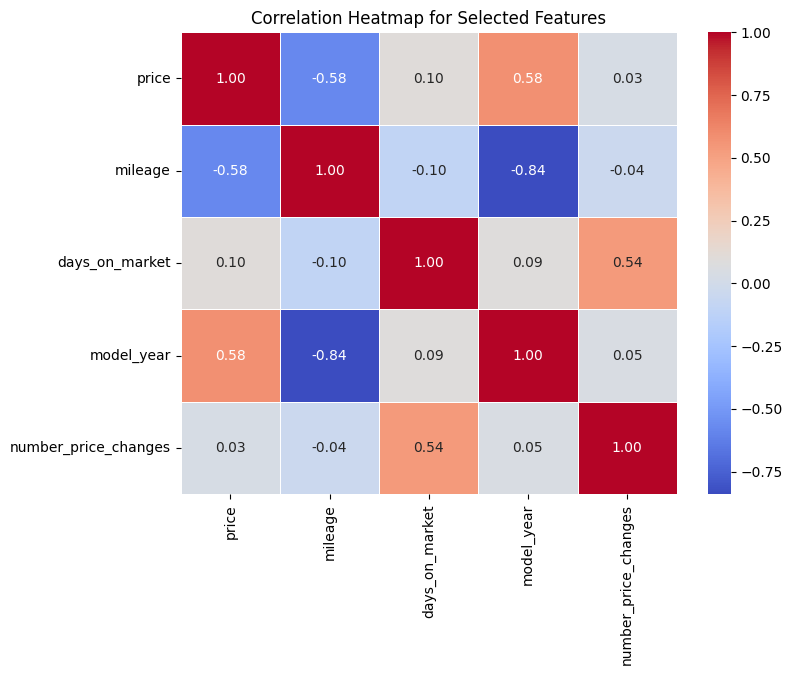

In [ ]:
# Correlation matrix for selected numeric features
correlation_matrix = df[['price', 'mileage', 'days_on_market', 'model_year','number_price_changes']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap for Selected Features')
plt.show()

**Analyzing Distribution of Fuel Types:**



*   Bar Chart Visualization: A bar chart is created to visually represent the distribution of cars by fuel type. This includes custom colors and edge colors for each bar, enhancing visual appeal and readability. The chart also includes labels and titles with adjusted font sizes for better visibility and aesthetics.


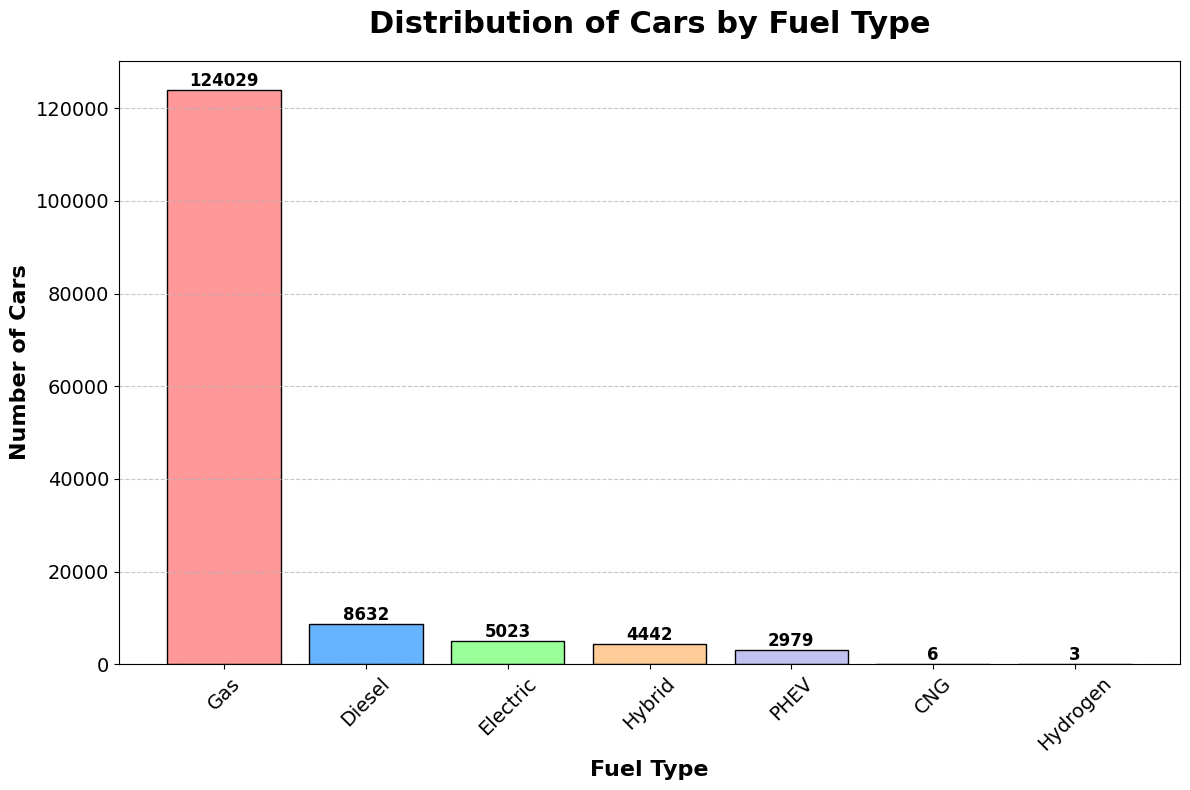

In [ ]:
# Count the number of cars by fuel type in the dataset
fuel_type_counts = df['fuel_type_from_vin'].value_counts()

# Sort the counts to ensure all categories are visible
fuel_type_counts = fuel_type_counts.sort_values(ascending=False)

# Plot a bar chart to show the distribution of cars by fuel type
plt.figure(figsize=(12, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#76D7C4']
bars = plt.bar(fuel_type_counts.index, fuel_type_counts.values, color=colors, edgecolor='black')
plt.xlabel('Fuel Type', fontsize=16, weight='bold')
plt.ylabel('Number of Cars', fontsize=16, weight='bold')
plt.title('Distribution of Cars by Fuel Type', fontsize=22, pad=20, weight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding count labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

**Visualizing Car Make Distribution:**


*   Count Plot for Makes: Utilizes Seaborn’s countplot to visualize the number of cars for each make. The make values are ordered by frequency, ensuring that the plot highlights the most common makes. This type of plot is crucial for understanding which car brands dominate the dataset.
*   Customization: The plot is customized with titles, axis labels, and rotation for x-ticks to improve readability, particularly when dealing with numerous categories.



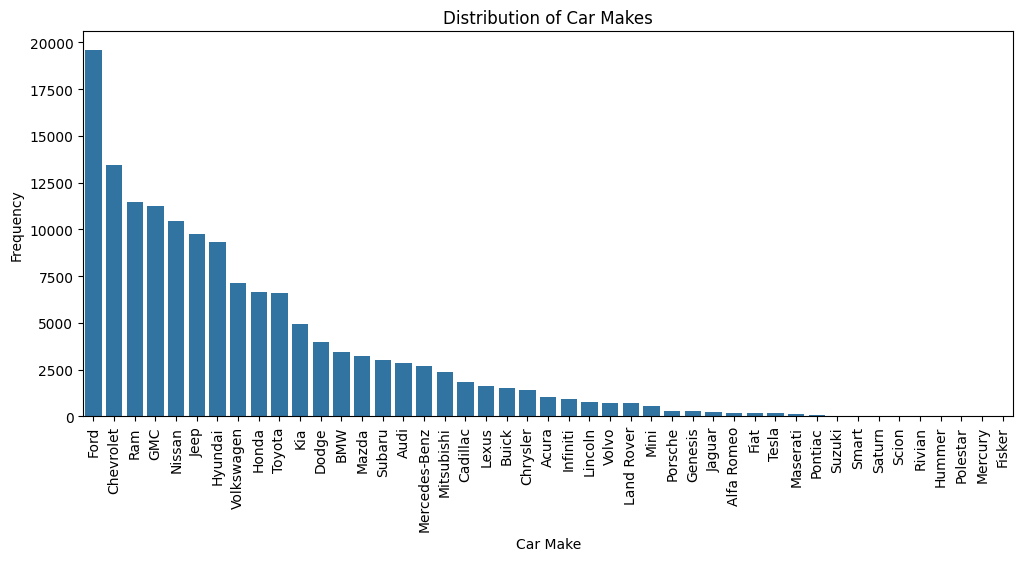

In [ ]:
# Count plot for 'make'
plt.figure(figsize=(12, 5))
sns.countplot(x='make', data=df, order=df['make'].value_counts().index)
plt.title('Distribution of Car Makes')
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Frequency')
plt.show()

**Analyzing Average Prices by Car Make:**

*   Grouping and Calculating Averages: The data is grouped by make, and the average price for each make is calculated. This grouping reveals insights into the pricing strategies or market positioning of different car brands.
*   Bar Graph for Average Prices: A bar graph is then plotted to show these average prices, allowing for a direct visual comparison of prices across different makes.



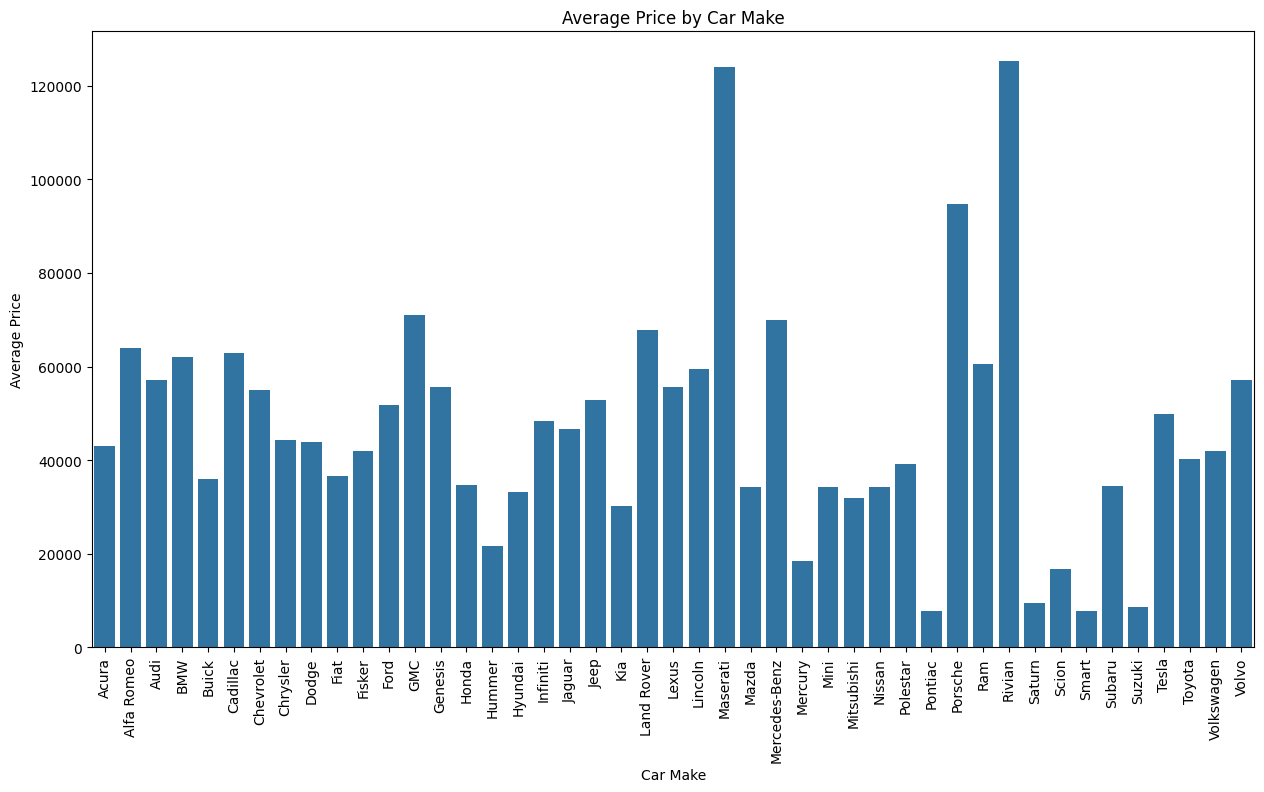

In [ ]:
# Calculate the average price for each car make
avg_price_by_make = df.groupby('make')['price'].mean().reset_index()

# Create a bar graph for car make vs average price
plt.figure(figsize=(15, 8))
sns.barplot(x='make', y='price', data=avg_price_by_make, order=avg_price_by_make['make'])
plt.title('Average Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

**Analyzing Audi Model Prices:**

*   Calculating Average Prices: Averages of the price for each Audi model are computed. This step helps understand the price distribution across different Audi models, useful for pricing strategy analysis.
*   Bar Graph for Prices: A bar graph displays these average prices by model, providing a visual representation that highlights variations in pricing among Audi models.



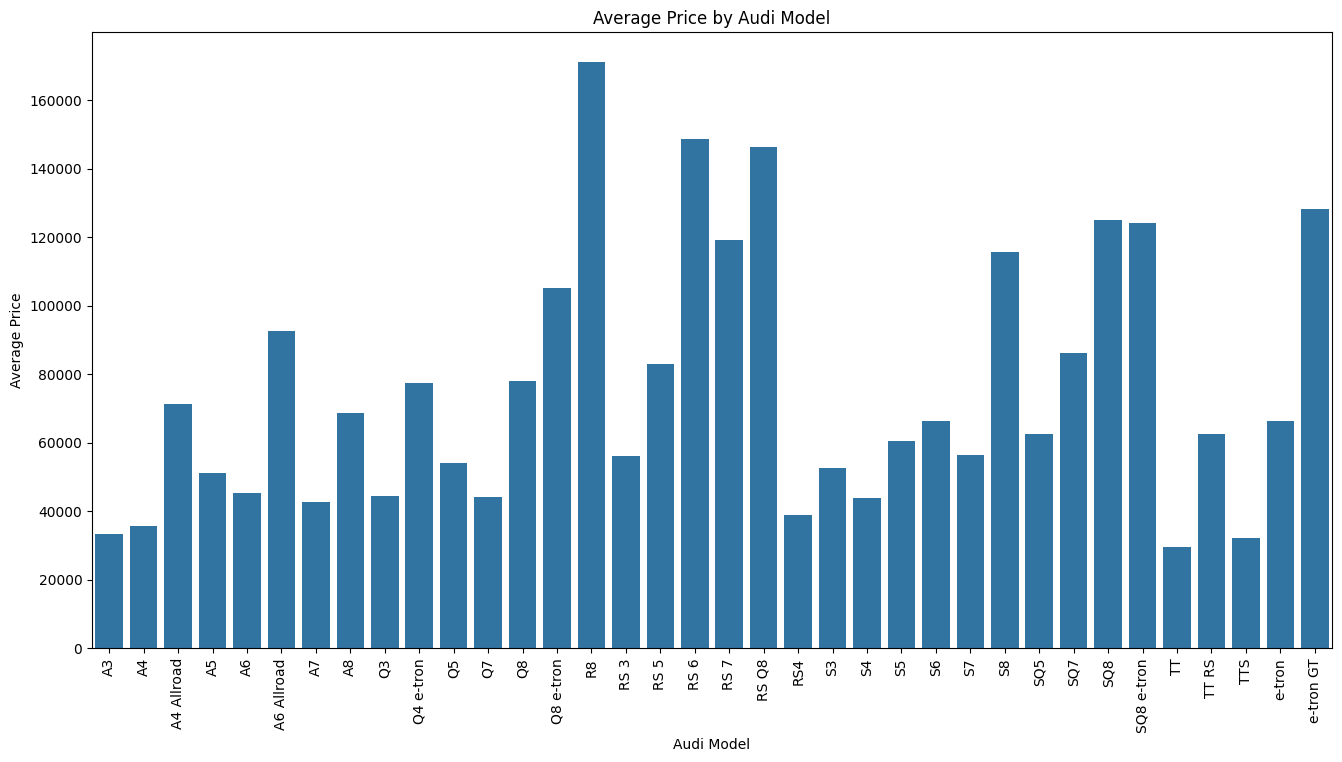

In [ ]:
# Filter the data to include only Audi cars and specific models
audi_data = df[df['make'] == 'Audi']

# Calculate the average price for each Audi model
avg_price_by_audi_model = audi_data.groupby('model')['price'].mean().reset_index()

# Create a bar graph for Audi models vs average price
plt.figure(figsize=(16, 8))
sns.barplot(data=avg_price_by_audi_model, x='model', y='price', order=avg_price_by_audi_model['model'], errorbar=None)
plt.title('Average Price by Audi Model')
plt.xlabel('Audi Model')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

**Analyzing Mileage Across Makes:**



*   Calculating Average Mileage: Computes the average mileage for each car make in the dataset. This average can reveal insights about the usage patterns associated with different brands.
*   Bar Graph for Mileage: Plots these averages, showing how mileage varies across different makes, which can influence consumer perception and resale values.



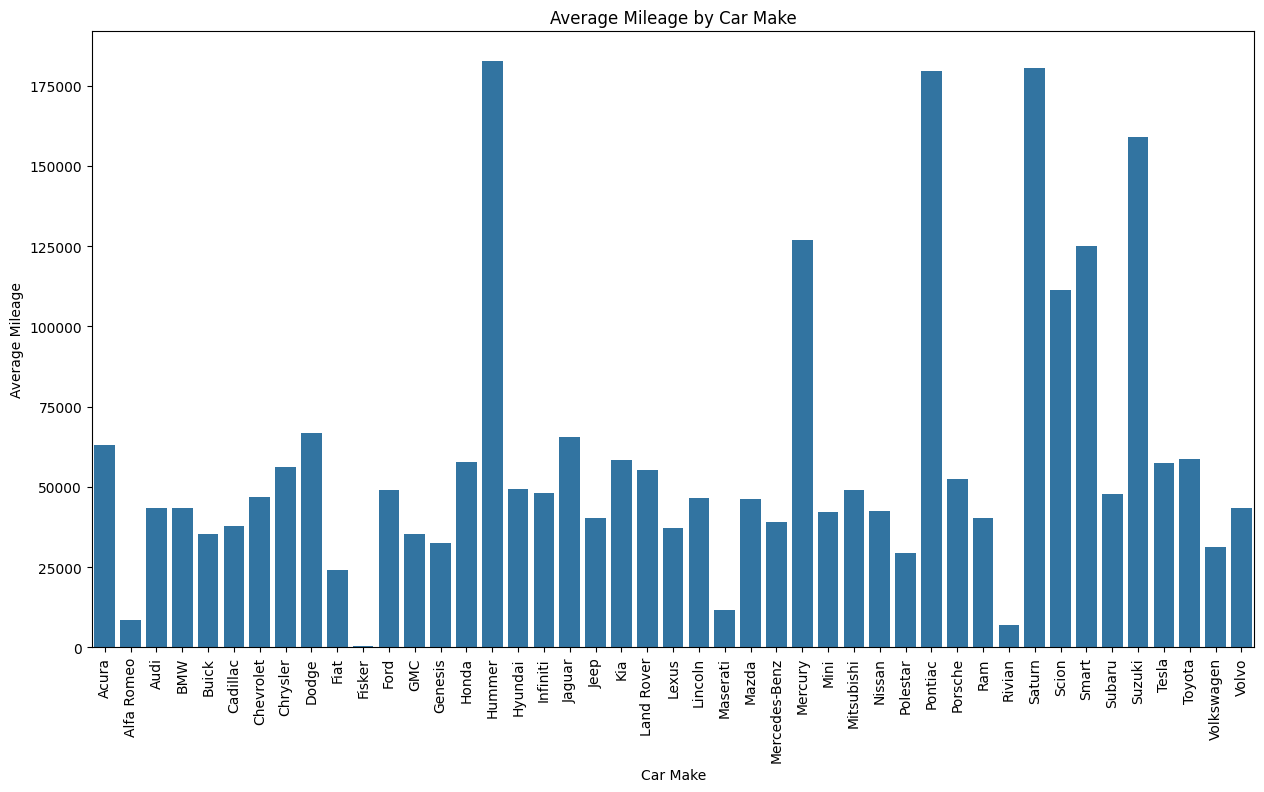

In [ ]:
# Calculate the average mileage for each car make
avg_mileage_by_make = df.groupby('make')['mileage'].mean().reset_index()

# Create a bar graph for car make vs average mileage
plt.figure(figsize=(15, 8))
sns.barplot(x='make', y='mileage', data=avg_mileage_by_make)
plt.title('Average Mileage by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Mileage')
plt.xticks(rotation=90)
plt.show()

** Analyzing Honda Model Mileage:**


*   Calculating Average Mileage: Calculates the average mileage for each Honda model, providing insights into how different models accumulate mileage.
*   Bar Graph for Mileage: Displays this information in a bar graph, offering a clear visual comparison of mileage across Honda models.



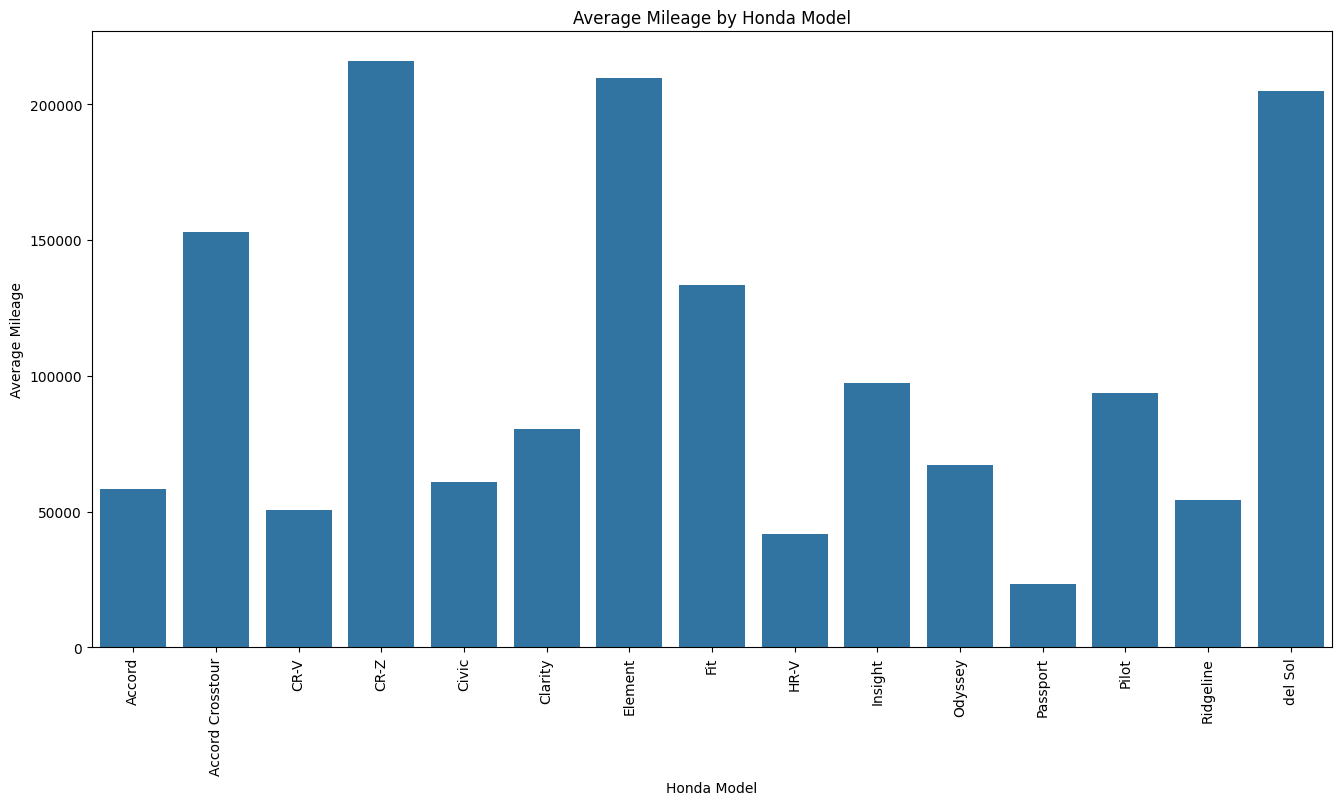

In [ ]:
# Filter the data to include only Honda cars and specific models
honda_data = df[df['make'] == 'Honda']

# Calculate the average mileage for each Honda model
avg_mileage_by_honda_model = honda_data.groupby('model')['mileage'].mean().reset_index()

# Create a bar graph for Honda models vs average mileage
plt.figure(figsize=(16, 8))
sns.barplot(data=avg_mileage_by_honda_model, x='model', y='mileage', order=avg_mileage_by_honda_model['model'], errorbar=None)
plt.title('Average Mileage by Honda Model')
plt.xlabel('Honda Model')
plt.ylabel('Average Mileage')
plt.xticks(rotation=90)
plt.show()

**Top and Least Common Car Makes:**



*   Top Makes: Displays a count plot for the ten most common car makes in the dataset. This visualization helps identify the most prevalent brands in the dataset.

*   Bar Plot for Days on Market: Shows average days on the market for these top makes, providing insights into how quickly cars from these brands tend to sell.
*   Least Common Makes: Similar analysis for the ten least common makes, helping to identify brands that are less frequently listed.







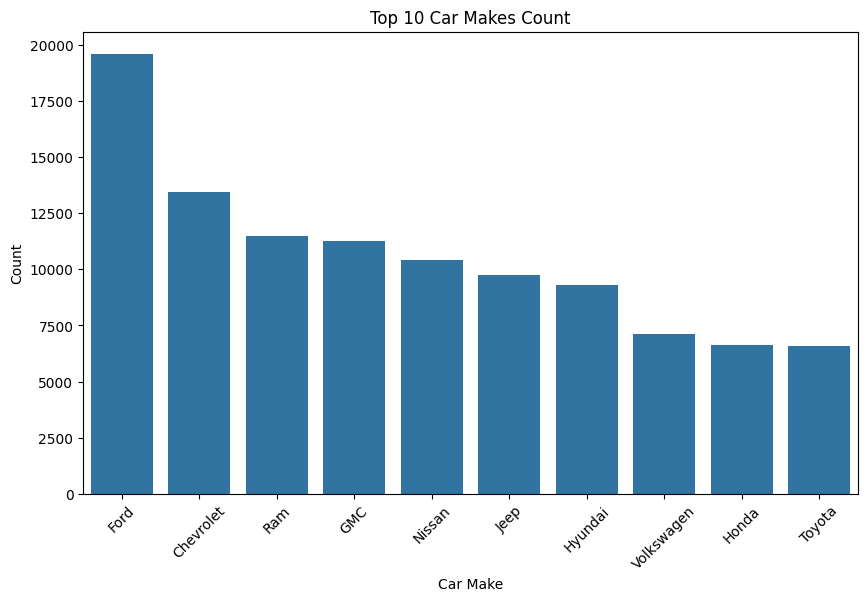

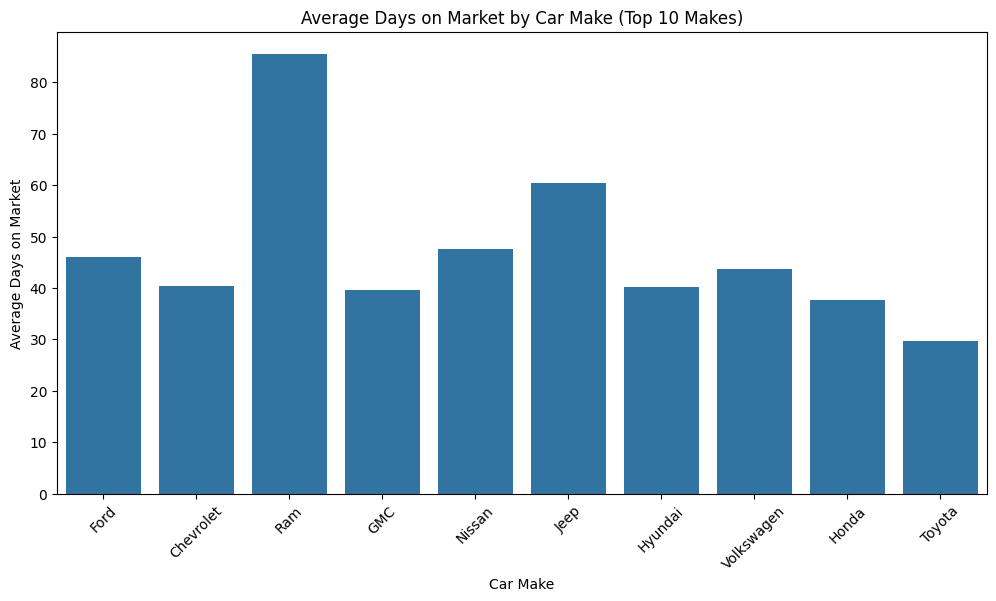

In [ ]:
# Count plot for 'make' to see the most common car makes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='make', order=df['make'].value_counts().index[:10])  # Display top 10 makes
plt.title('Top 10 Car Makes Count')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar plot for 'make' vs. average 'days_on_market' (for top 10 makes)
top_makes = df['make'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.barplot(data=df[df['make'].isin(top_makes)], x='make', y='days_on_market', order=top_makes, errorbar=None, estimator=np.mean)
plt.title('Average Days on Market by Car Make (Top 10 Makes)')
plt.xlabel('Car Make')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=45)
plt.show()

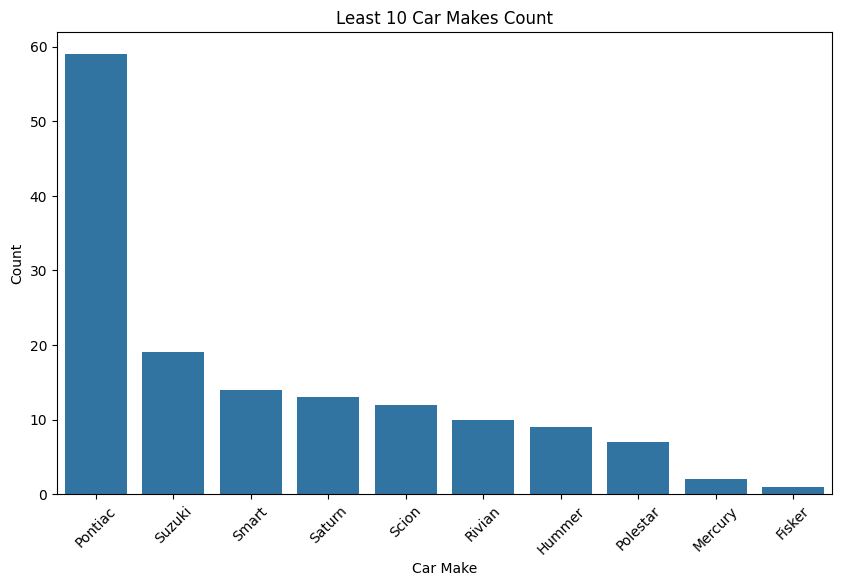

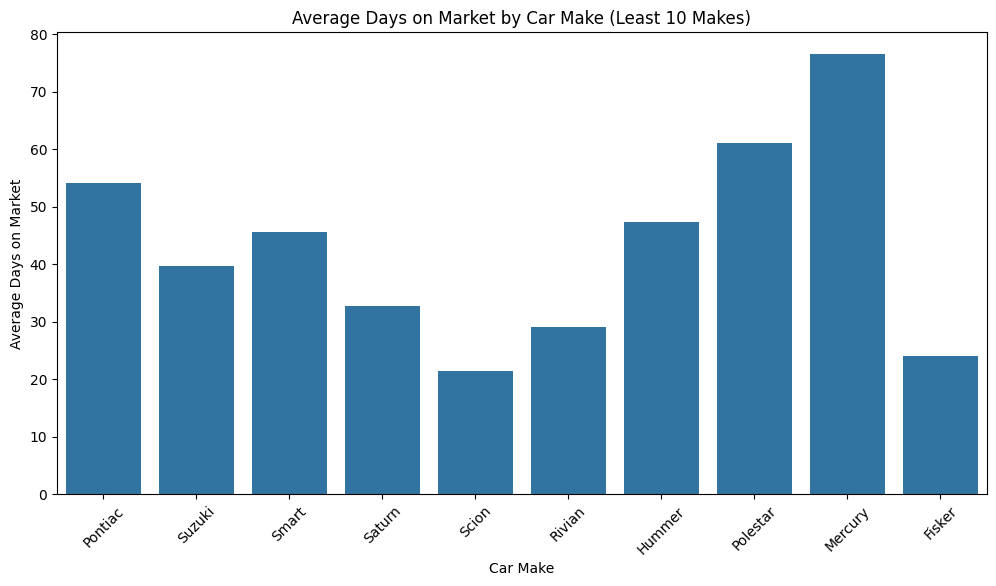

In [ ]:
# Count plot for 'make' to see the least common car makes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='make', order=df['make'].value_counts().index[-10:])  # Display least 10 makes
plt.title('Least 10 Car Makes Count')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar plot for 'make' vs. average 'days_on_market' (for least 10 makes)
least_makes = df['make'].value_counts().index[-10:]
plt.figure(figsize=(12, 6))
sns.barplot(data=df[df['make'].isin(least_makes)], x='make', y='days_on_market', order=least_makes, errorbar=None, estimator=np.mean)
plt.title('Average Days on Market by Car Make (Least 10 Makes)')
plt.xlabel('Car Make')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define the input parameters for prediction
make_name = 'Honda'  # Replace with the specific make name
model_name = 'Civic'  # Replace with the specific model name
model_year = 2021  # Replace with the specific vehicle age

# Filter the dataset based on the input parameters
filtered_data = df[(df['make'] == make_name) & (df['model'] == model_name) & (df['model_year'] == model_year)]

# Check if there is data available for the given inputs
if not filtered_data.empty:
    # Calculate the average days on market for the filtered data
    predicted_days_on_market = filtered_data['days_on_market'].mean()
    print(f"The average days on market for {make_name} {model_name} (Age: {model_year} years): {predicted_days_on_market:.2f} days")
else:
    print(f"No data available for {make_name} {model_name} (Age: {model_year} years)")

The average days on market for Honda Civic (Age: 2021 years): 36.62 days


**Handling Missing Values and Encoding:**


*   Checking Missing Values: The code checks for missing entries in the 'transmission_from_vin' and 'fuel_type_from_vin' columns. This is crucial for determining the completeness of critical categorical data that could influence vehicle classification and predictive modeling.

*   Output Missing Counts: It then prints out the number of missing values found in these columns, providing insights into the data's integrity.
*   Encoding Transmission Data: The 'transmission_from_vin' column is encoded into numeric values where 'A' (Automatic) and '7' are mapped to 0, and 'M' (Manual) and '6' are mapped to 1. This binary encoding simplifies the machine learning model's ability to process this data.


*   Validation of Encoding: Prints out the data type, unique values, and the counts of each category post-encoding to verify the encoding process.




In [ ]:
# Check for missing values in 'transmission_from_vin' and 'fuel_type_from_vin'
num_missing_transmission = df['transmission_from_vin'].isnull().sum()
num_missing_fuel_type = df['fuel_type_from_vin'].isnull().sum()
print(f"Number of NaN values in 'transmission_from_vin': {num_missing_transmission}")
print(f"Number of NaN values in 'fuel_type_from_vin': {num_missing_fuel_type}")

# Encode 'transmission_from_vin' column
df['transmission_from_vin'] = df['transmission_from_vin'].map({'A': 0, 'M': 1, '6': 1, '7': 0})
print("Data type of 'transmission_from_vin':", df['transmission_from_vin'].dtype)
print("Unique values in 'transmission_from_vin':", df['transmission_from_vin'].unique())
print(df['transmission_from_vin'].value_counts())

Number of NaN values in 'transmission_from_vin': 0
Number of NaN values in 'fuel_type_from_vin': 0
Data type of 'transmission_from_vin': int64
Unique values in 'transmission_from_vin': [0 1]
transmission_from_vin
0    141137
1      3977
Name: count, dtype: int64


**Visualization of Transmission Types:**



*   Counting Transmission Types: It counts the frequency of each encoded transmission type to understand the distribution of automatic vs. manual transmissions within the dataset.
*   Pie Chart Visualization: A pie chart is plotted to visually represent the proportion of automatic and manual cars. This helps in quickly assessing the balance or dominance of one type over the other in the dataset.



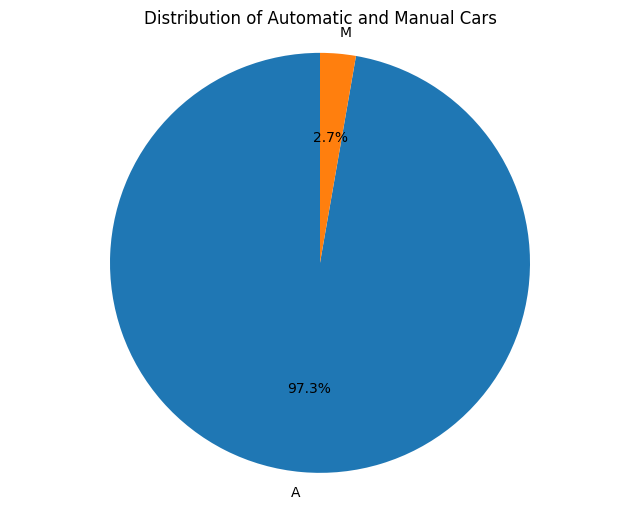

In [ ]:
# Count the number of automatic and manual cars in the dataset
transmission_counts = df['transmission_from_vin'].value_counts()

# Map the values 0 -> 'A' and 1 -> 'M'
transmission_counts.index = transmission_counts.index.map({0: 'A', 1: 'M'})

# Plot a pie chart to show the distribution of automatic and manual cars
plt.figure(figsize=(8, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Automatic and Manual Cars')
plt.axis('equal')
plt.show()

**Age Calculation:**


*   Setting Current Year: Specifies the current year to assist in calculating the age of the vehicles.
*   Calculating Vehicle Age: Subtracts the model year from the current year to derive the vehicle's age, which is a significant factor in valuation and market dynamics.



In [ ]:
current_year = 2024  # Replace with the current year as needed
df['vehicle_age'] = current_year - df['model_year']


**Date Handling**


*   Date Format Standardization: Converts 'listing_first_date' from a string to a standardized datetime format, replacing slashes with dashes for consistency.
*   Extraction of Date Components: Further splits the 'listing_first_date' into separate columns for year, month, and day to facilitate detailed time-series analysis or temporal segmentation.



In [ ]:
# Ensure the column is treated as string type
df['listing_first_date'] = df['listing_first_date'].astype(str)

# Replace slashes with dashes in the 'listing_first_date' column
df['listing_first_date'] = df['listing_first_date'].str.replace('/', '-')

# Convert 'listing_first_date' to datetime format
df['listing_first_date'] = pd.to_datetime(df['listing_first_date'], errors='coerce')

# Create new columns for year, month, and day
df['year'] = df['listing_first_date'].dt.year
df['month'] = df['listing_first_date'].dt.month
df['day'] = df['listing_first_date'].dt.day

# Display the dataframe to verify the new columns
print(df[['listing_first_date', 'year', 'month', 'day']].head())

  listing_first_date  year  month  day
0         2024-07-22  2024      7   22
1         2024-07-20  2024      7   20
2         2024-06-07  2024      6    7
3         2023-08-28  2023      8   28
4         2024-07-21  2024      7   21


In [ ]:
# Display all column names in the DataFrame
print(df.columns.tolist())

['model_year', 'make', 'model', 'mileage', 'price', 'transmission_from_vin', 'fuel_type_from_vin', 'days_on_market', 'msrp', 'number_price_changes', 'dealer_name', 'listing_type', 'listing_first_date', 'vehicle_age', 'year', 'month', 'day']


**Feature and Target Definition:**


*   Features and Target Variable: The features X are defined as a set of predictors such as number_price_changes, vehicle_age, mileage, price, msrp, and others including categorical data like dealer_name, listing_type, make, and model. The target variable y is defined as days_on_market, which is the number of days a vehicle remains unsold on the market. This setup is typical for a regression problem where you predict a continuous outcome based on various inputs.



In [ ]:
# Define features and target variable for regression
X = df[['number_price_changes', 'vehicle_age', 'mileage', 'price', 'msrp', 'dealer_name', 'listing_type', 'make', 'model', 'year', 'month', 'day']]

y = df['days_on_market']  # Continuous target for regression

**Data Splitting for Training and Testing:**


*   Splitting Data: Utilizes train_test_split to divide the dataset into training and testing sets, with 20% of the data reserved for testing. This helps in evaluating the model on unseen data, ensuring that the model's performance metrics are robust and reliable.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Data Preprocessing:**



*   Preprocessor Setup: A ColumnTransformer is used to apply different preprocessing steps to numerical and categorical features. Numerical features are imputed (missing values replaced with the mean) and scaled (standardized to have zero mean and unit variance), while categorical features are one-hot encoded (converted into binary columns for each category).


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_features = ['mileage', 'price', 'msrp', 'vehicle_age', 'year', 'month', 'day', 'number_price_changes']
categorical_features = ['dealer_name', 'listing_type', 'make', 'model']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

**Model Building and Hyperparameter Tuning:**



*   Pipeline Creation: A Pipeline integrates the preprocessing steps with a regression model, specifically a Ridge regression using the least squares solver. This encapsulation simplifies the model training and prediction process.
*   Hyperparameter Tuning: RandomizedSearchCV is employed to optimize model parameters over 20 iterations with a 5-fold cross-validation strategy, focusing on the Ridge regularization strength (alpha) and the imputation strategy for missing values. This approach efficiently searches through a large hyperparameter space to find the best model settings.



In [ ]:
from sklearn.linear_model import Ridge

pipeline_Ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(solver='lsqr'))
])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'regressor__alpha': np.logspace(-6, 3, 100),
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent']
}

random_search = RandomizedSearchCV(
    estimator=pipeline_Ridge,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['mileage',
                                                                                'price',
                                                                                'msrp',
                                                                                'vehicle_age',
                                                                                'year',
                                                                                'month',
                                                                                'day',
                                                                                'number_price_changes']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['dealer_name',
                                                                                'listing_type',
                                                                                'make',
                                                                                'm...
       8.11130831e+00, 1.00000000e+01, 1.23284674e+01, 1.51991108e+01,
       1.87381742e+01, 2.31012970e+01, 2.84803587e+01, 3.51119173e+01,
       4.32876128e+01, 5.33669923e+01, 6.57933225e+01, 8.11130831e+01,
       1.00000000e+02, 1.23284674e+02, 1.51991108e+02, 1.87381742e+02,
       2.31012970e+02, 2.84803587e+02, 3.51119173e+02, 4.32876128e+02,
       5.33669923e+02, 6.57933225e+02, 8.11130831e+02, 1.00000000e+03])},
                   random_state=42, scoring='r2')

**Model Evaluation:**

*   Model Training and Prediction: After finding the optimal parameters, the model is applied to the test data to generate predictions.

*   Performance Metrics: The model's performance is evaluated using the root mean squared error (RMSE) and R-squared value, providing insights into the model's accuracy and the proportion of variance in the target variable explained by the model.
*   Output Performance Metrics: Prints out RMSE, R-squared, and the best hyperparameters found, offering a quantitative evaluation of model performance.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Optimized Ridge Regression Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Best Parameters: {random_search.best_params_}")

Optimized Ridge Regression Model Evaluation:
Root Mean Squared Error (RMSE): 17.91716856098701
R-squared: 0.9032987767776998
Best Parameters: {'regressor__alpha': 6.5793322465756825, 'preprocessor__num__imputer__strategy': 'median'}


**Result Compilation and Output:**


*   Combining Predictions with Test Data: Predictions are combined with the actual test values and the test feature set to create a comprehensive dataframe that juxtaposes predicted and actual values alongside the relevant features.
*   Saving Results: This combined dataframe is saved to a CSV file, model_predictions_combined.csv, facilitating further analysis or sharing with stakeholders.



In [ ]:
predictions_df = pd.DataFrame(y_test_pred, columns=['Predicted'])
combined_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), predictions_df], axis=1)
combined_df.columns = list(X_test.columns) + ['Actual', 'Predicted']
combined_df.to_csv('model_predictions_combined.csv', index=False)
print("Combined data with predictions saved to model_predictions_combined.csv")

Combined data with predictions saved to model_predictions_combined.csv
